<a href="https://colab.research.google.com/github/thelemoncookie-data/01_Project/blob/main/Sales_Predictions_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Darlene Phan
July 8, 2022
Part 1

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales = pd.read_csv('/content/drive/MyDrive/Stack 1/02 Week 2: Pandas/sales_predictions (2).csv')

## Part 2

In [4]:
rename = {'Item_Identifier': 'item_id',
'Item_Weight': 'item_weight',
'Item_Fat_Content': 'item_fat_content',
'Item_Visibility': 'item_visibility',
'Item_Type': 'item_type',
'Item_MRP': 'mrp',
'Outlet_Identifier': 'outlet_id',
'Outlet_Establishment_Year': 'est_year',
'Outlet_Size': 'outlet_size',
'Outlet_Location_Type': 'loc_type',
'Outlet_Type': 'outlet_type',
'Item_Outlet_Sales': 'item_sales'
}
sales.rename(columns=rename, inplace=True)
sales.head()

,item_id,item_weight,item_fat_content,item_visibility,item_type,mrp,outlet_id,est_year,outlet_size,loc_type,outlet_type,item_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales.shape

(8523, 12)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           8523 non-null   object 
 1   item_weight       7060 non-null   float64
 2   item_fat_content  8523 non-null   object 
 3   item_visibility   8523 non-null   float64
 4   item_type         8523 non-null   object 
 5   mrp               8523 non-null   float64
 6   outlet_id         8523 non-null   object 
 7   est_year          8523 non-null   int64  
 8   outlet_size       6113 non-null   object 
 9   loc_type          8523 non-null   object 
 10  outlet_type       8523 non-null   object 
 11  item_sales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#checking for duplicates
sales.duplicated().sum()

0

In [8]:
## These cols dont contribute much to sales perdictions. Outlet size might contribute a little but overall not that much. 
sales = sales.drop(columns=['item_weight','outlet_size'])

In [9]:
sales.isnull().sum()

item_id             0
item_fat_content    0
item_visibility     0
item_type           0
mrp                 0
outlet_id           0
est_year            0
loc_type            0
outlet_type         0
item_sales          0
dtype: int64

In [10]:
#adjusting categorical errors
sales['item_fat_content'] = sales['item_fat_content'].replace('LF', 'Low Fat')
sales['item_fat_content'] = sales['item_fat_content'].replace('low fat', 'Low Fat')
sales['item_fat_content'] = sales['item_fat_content'].replace('reg', 'Regular')
sales.item_fat_content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [11]:
sales.describe() 

,item_visibility,mrp,est_year,item_sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## Part 3


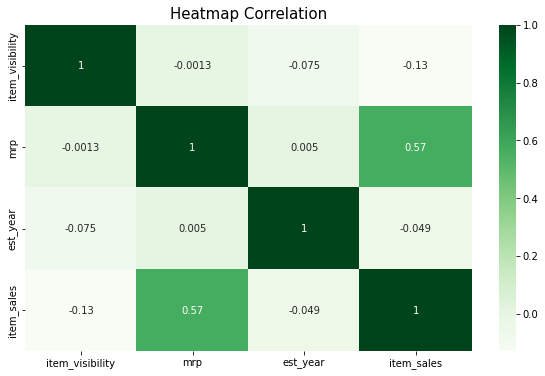

In [12]:
#Heatmap
corr = sales.corr()
plt.figure(figsize=(10,6),)
sns.heatmap(corr, cmap='Greens', annot=True)
plt.title('Heatmap Correlation', fontsize=15)
plt.show()

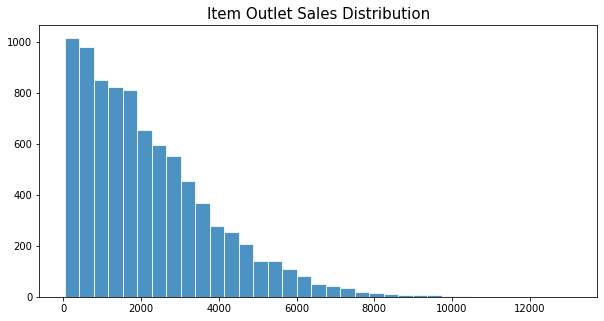

In [13]:
#Histogram
plt.figure(figsize=(10,5))
plt.hist(sales['item_sales'], alpha=.8, bins=35, edgecolor='w')
plt.title('Item Outlet Sales Distribution', fontsize=15)
plt.show()

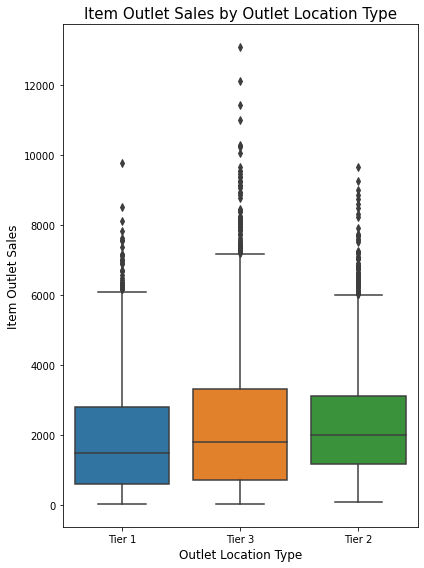

In [14]:
#Boxplot
plt.figure(figsize=(6,8))
sns.boxplot(data=sales, x='loc_type', y='item_sales')
plt.title('Item Outlet Sales by Outlet Location Type', fontsize=15)
plt.xlabel('Outlet Location Type', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.tight_layout()
plt.show()

## Part 4

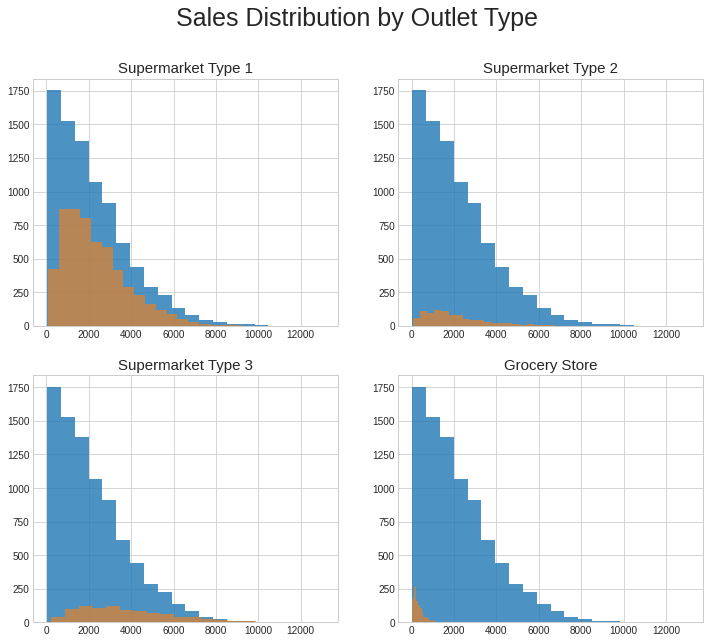

In [15]:
type1 = sales[sales['outlet_type'] == 'Supermarket Type1']['item_sales']
type2 = sales[sales['outlet_type'] == 'Supermarket Type2']['item_sales']
type3 = sales[sales['outlet_type'] == 'Supermarket Type3']['item_sales']
grocery_store = sales[sales['outlet_type'] == 'Grocery Store']['item_sales']

plt.style.use('seaborn-whitegrid')
sequential_colors = sns.color_palette("mako", 10)

plt.figure(figsize=(12,10))
plt.suptitle('Sales Distribution by Outlet Type', fontsize=25)

plt.subplot(2,2,1)
plt.hist(sales['item_sales'], alpha=.8, label = 'Total Item Sales', bins=20)
plt.hist(type1, alpha=.6, label='Supermarket Type 1', bins=20)
plt.title('Supermarket Type 1', fontsize=15)

plt.subplot(2,2,2)
plt.hist(sales['item_sales'], alpha=.8, label = 'Total Item Sales', bins=20)
plt.hist(type2, alpha=.6, label='Supermarket Type 2', bins=20)
plt.title('Supermarket Type 2', fontsize=15)

plt.subplot(2,2,3)
plt.hist(sales['item_sales'], alpha=.8, label = 'Total Item Sales', bins=20)
plt.hist(type3, alpha=.6, label='Supermarket Type 3', bins=20)
plt.title('Supermarket Type 3', fontsize=15)

plt.subplot(2,2,4)
plt.hist(sales['item_sales'], alpha=.8, label = 'Total Item Sales', bins=20)
plt.hist(grocery_store, alpha=.6, label='Grocery Store', bins=20)
plt.title('Grocery Store', fontsize=15)


plt.show()

Histrogram of Sales Distribution by Outlet type shows which type of outlets generate the most sales compared to the overall sales. 

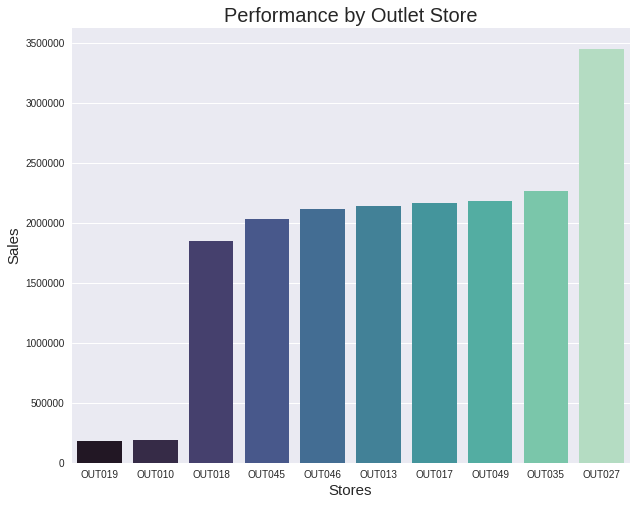

In [16]:
outlet_sales = sales.groupby(['outlet_type', 'outlet_id'])['item_sales'].sum().sort_values()
outlet_sales = outlet_sales.to_frame().reset_index()

sequential_colors = sns.color_palette("mako", 10)
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=outlet_sales, x='outlet_id', y='item_sales', ci=None, palette=sequential_colors)
plt.title('Performance by Outlet Store', fontsize=20)

plt.xlabel('Stores', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

plt.show()

Performance by Outlet Store, gives you a deeper dive on which stores perform well compared to the ones that do not.

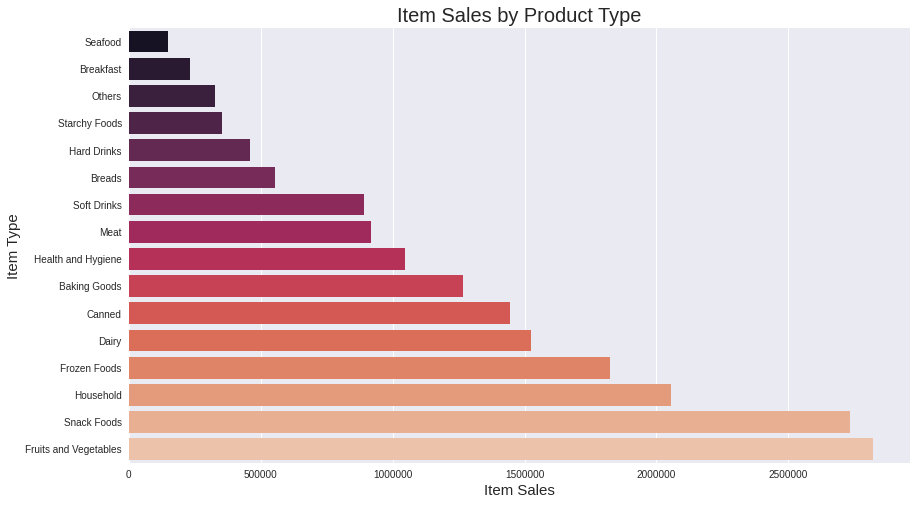

In [17]:
item_sales = sales.groupby('item_type')['item_sales'].sum().to_frame().reset_index().sort_values('item_sales')

sequential_colors = sns.color_palette("rocket", 17)
plt.figure(figsize=(14,8))

ax = sns.barplot(data=item_sales, y='item_type', x='item_sales', ci=None, palette=sequential_colors)
plt.title('Item Sales by Product Type', fontsize=20)

plt.ylabel('Item Type', fontsize=15)
plt.xlabel('Item Sales', fontsize=15)
current_values = plt.gca().get_xticks()
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

plt.show()

Item Sales by Product Type, a comprehensive look at what products actually sell well. 

## Part 5 

Identify X features and Y target

In [25]:
X = sales.drop(columns = ['item_sales', 'est_year', 'item_id', 'outlet_id'])
y  = sales['item_sales']

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,item_fat_content,item_visibility,item_type,mrp,loc_type,outlet_type
4776,Low Fat,0.029565,Household,256.4646,Tier 3,Supermarket Type2
7510,Regular,0.000000,Snack Foods,179.7660,Tier 3,Supermarket Type2
5828,Regular,0.158716,Meat,157.2946,Tier 1,Supermarket Type1
5327,Low Fat,0.014628,Baking Goods,82.3250,Tier 2,Supermarket Type1
4810,Low Fat,0.016645,Frozen Foods,120.9098,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,0.286345,Fruits and Vegetables,139.1838,Tier 3,Grocery Store
5191,Low Fat,0.117575,Frozen Foods,75.6670,Tier 2,Supermarket Type1
5390,Low Fat,0.018944,Health and Hygiene,237.3590,Tier 2,Supermarket Type1
860,Low Fat,0.054363,Snack Foods,117.9466,Tier 2,Supermarket Type1


Create a preprocessing object to prepare the dataset for Machine Learning

In [26]:
from sklearn.compose import make_column_selector
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [30]:
#One - Hot Encoder 
ohe = OneHotEncoder()

#Scaer
scaler = StandardScaler()

In [31]:
#Numeric Pipeline
numeric_pipline = make_pipeline(scaler)

#Categorical Pipeline
categorical_pipe = make_pipeline(ohe)

In [33]:
num_tuple = (numeric_pipline, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

#ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f46e5eb0e10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f46e5eb0050>)])

Suggestions : 
1. Explain in a text cell why you are using the encoding and imputing strategies you are instead of other options.  Why impute rather than drop columns or rows?  Why use median , mean or mode?  Why fill with most frequent instead of creating a new category for missing data?  Your choices aren't wrong, but these kinds of explanations of your thought process are important in data science work.
<br> <br>
    I'm not imputing any data because there is no missing data. Missing data has already been dropped and touched upon in section 2
---


2.  For best results in the final part of Project 1 when you're creating your ML model, you can  drop the 'Item_Identifier' and 'Outlet_Identifier' features/columns out, and also consider dropping the 'Outlet_Establishment_Year' as well.  Identifiers are unique to every single product, so inclusion of those will provide no value, and likely decrease your model performance."
<br><br>
  Outlet establishment year was already dropped. the following was also dropped. 